In [19]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ants

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [38]:
data_csv_fn = '../Data/synth-data-01.csv'
df = pd.read_csv(data_csv_fn)
patients = df['dx'].values==1
controls = df['dx'].values==0
df

,Unnamed: 0,subID,dx,path,td_sphere_1,td_sphere_2,adhd_sphere_1,adhd_sphere_2,td_tx,adhd_tx
0,0,sub-0000,1,../synth-data-01/ADHD-sub-0000.nii.gz,24.636458,20.592753,12.834489,10.035014,4.043705,2.799475
1,1,sub-0001,1,../synth-data-01/ADHD-sub-0001.nii.gz,15.945992,12.212052,11.011581,11.316208,3.733940,-0.304627
2,2,sub-0002,1,../synth-data-01/ADHD-sub-0002.nii.gz,19.401910,15.016307,12.606499,14.643771,4.385604,-2.037272
3,3,sub-0003,1,../synth-data-01/ADHD-sub-0003.nii.gz,31.737532,26.812256,10.869074,13.482636,4.925275,-2.613562
4,4,sub-0004,1,../synth-data-01/ADHD-sub-0004.nii.gz,24.533527,25.962776,6.159082,6.337349,-1.429249,-0.178267
...,...,...,...,...,...,...,...,...,...,...
995,995,sub-0495,0,../synth-data-01/TD-sub-0495.nii.gz,29.806246,31.775410,0.000000,0.000000,-1.969164,0.000000
996,996,sub-0496,0,../synth-data-01/TD-sub-0496.nii.gz,14.683680,13.065503,0.000000,0.000000,1.618177,0.000000
997,997,sub-0497,0,../synth-data-01/TD-sub-0497.nii.gz,18.065294,13.891190,0.000000,0.000000,4.174104,0.000000
998,998,sub-0498,0,../synth-data-01/TD-sub-0498.nii.gz,14.391185,19.336634,0.000000,0.000000,-4.945449,0.000000


In [4]:
data = np.load('../Data/synth-data-01.npy')

In [5]:
data.shape

(1000, 64, 64, 64)

In [14]:
51033*3*0.001

153.099

(array([ 18.,  39.,  73., 264., 165., 192., 140.,  69.,  33.,   7.]),
 array([1331.932 , 1477.9268, 1623.9216, 1769.9164, 1915.9112, 2061.906 ,
        2207.9008, 2353.8956, 2499.8904, 2645.8852, 2791.88  ]),
 <BarContainer object of 10 artists>)

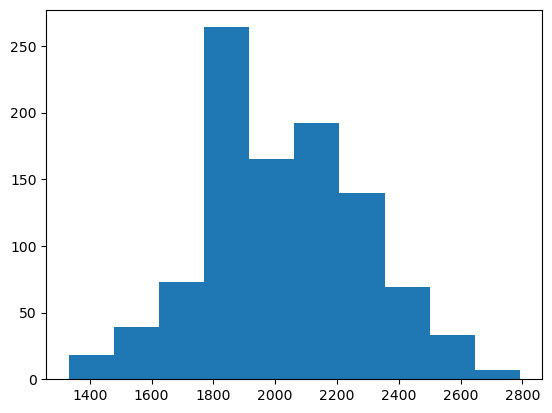

In [28]:
volvec = (data[:,:,:,:]>.001).sum(axis=-1).sum(axis=-1).sum(axis=-1)*28*.001
plt.hist(volvec)

(array([ 10.,  20.,  37., 133.,  80.,  95.,  70.,  29.,  21.,   5.]),
 array([1383.62 , 1524.446, 1665.272, 1806.098, 1946.924, 2087.75 ,
        2228.576, 2369.402, 2510.228, 2651.054, 2791.88 ]),
 <BarContainer object of 10 artists>)

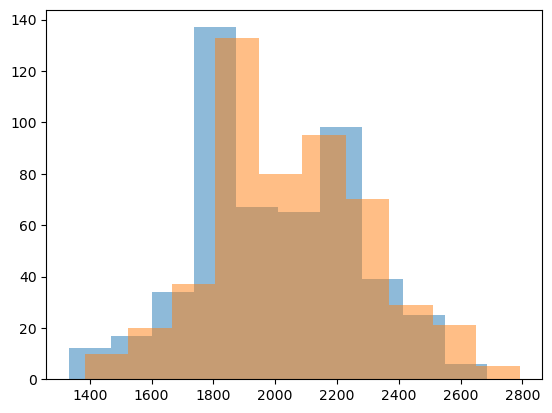

In [40]:
plt.hist((data[controls,:,:,:]>.001).sum(axis=-1).sum(axis=-1).sum(axis=-1)*28*.001,alpha=.5)
plt.hist((data[patients,:,:,:]>.001).sum(axis=-1).sum(axis=-1).sum(axis=-1)*28*.001,alpha=.5)

In [30]:
volvec.mean()

2029.0288199999998

In [31]:
volvec.min()

1331.932

In [32]:
volvec.max()

2791.88

In [20]:
ants.image_read('../Misc/Atlas_brain_2mm_64iso.nii')

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64, 64)
	 Spacing    : (2.8571, 3.4286, 2.8571)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]